In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

# Add the parent directory to path to import your modules
os.chdir("../..")
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from lib import *


Sparsity with L1 penalty: 80.92%
Test score with L1 penalty: 0.8371
Example run in 6.698 s


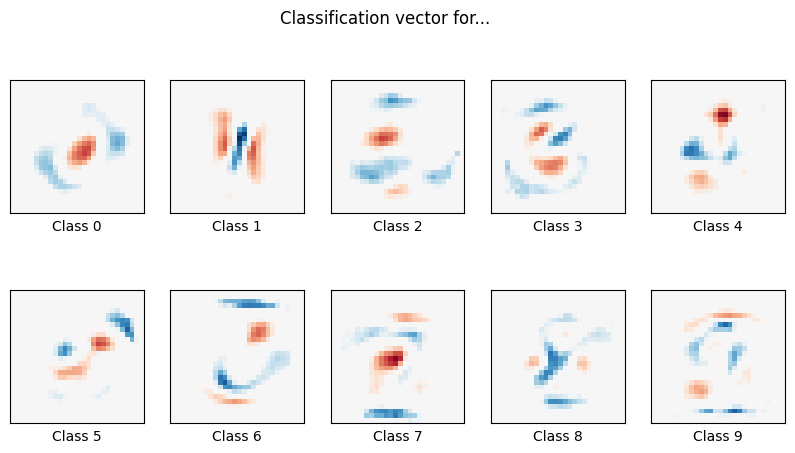

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [3]:
# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print dataset information
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


### Pengaruh Activation Function

In [4]:
# Define depth
depth_variations = [
    [784, 156, 156, 10]
]

# Define activation functions
activation_variations = [
    [Linear(), Linear(), Softmax()],
    [ReLU(), ReLU(), Softmax()],
    [Sigmoid(), Sigmoid(), Softmax()],
    [Tanh(), Tanh(), Softmax()],
    [ELU(), ELU(), Softmax()],
    [GELU(), GELU(), Softmax()],
]

In [5]:
# Create Neural Network
linear_act_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[0],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

relu_act_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[1],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

sigmoid_act_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[2],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

tanh_act_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[3],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

elu_act_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[4],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

gelu_act_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = activation_variations[5],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

In [6]:
# Create FFNN model
ffnn_linear_act = FFNN(linear_act_network)

ffnn_relu_act = FFNN(relu_act_network)

ffnn_sigmoid_act = FFNN(sigmoid_act_network)

ffnn_tanh_act = FFNN(tanh_act_network)

ffnn_elu_act = FFNN(elu_act_network)

ffnn_gelu_act = FFNN(gelu_act_network)

In [7]:
# Train the model
linear_act_history = ffnn_linear_act.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

relu_act_history = ffnn_relu_act.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

sigmoid_act_history = ffnn_sigmoid_act.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

tanh_act_history = ffnn_tanh_act.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

elu_act_history = ffnn_elu_act.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

gelu_act_history = ffnn_gelu_act.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 125.92it/s, loss=17.0878]


Epoch 1/20 - 1.02s - loss: 17.0878 - val_loss: 10.5857


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 94.49it/s, loss=9.6748] 


Epoch 2/20 - 1.35s - loss: 9.6748 - val_loss: 8.3444


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 138.15it/s, loss=8.0019]


Epoch 3/20 - 0.93s - loss: 8.0019 - val_loss: 7.5422


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 137.80it/s, loss=6.4576]


Epoch 4/20 - 0.93s - loss: 6.4576 - val_loss: 5.6571


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 94.34it/s, loss=5.4724] 


Epoch 5/20 - 1.37s - loss: 5.4724 - val_loss: 5.4675


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 150.90it/s, loss=4.8413]


Epoch 6/20 - 0.86s - loss: 4.8413 - val_loss: 4.5674


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 114.55it/s, loss=4.1984]


Epoch 7/20 - 1.11s - loss: 4.1984 - val_loss: 4.4264


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 130.17it/s, loss=3.9010]


Epoch 8/20 - 0.98s - loss: 3.9010 - val_loss: 4.4349


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 149.26it/s, loss=3.7000]


Epoch 9/20 - 0.86s - loss: 3.7000 - val_loss: 4.6739


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 135.97it/s, loss=3.6068]


Epoch 10/20 - 0.94s - loss: 3.6068 - val_loss: 4.2402


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 139.33it/s, loss=3.4974]


Epoch 11/20 - 0.92s - loss: 3.4974 - val_loss: 4.3080


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 160.25it/s, loss=3.4389]


Epoch 12/20 - 0.80s - loss: 3.4389 - val_loss: 4.2988


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 136.67it/s, loss=3.6121]


Epoch 13/20 - 0.94s - loss: 3.6121 - val_loss: 4.1205


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 148.18it/s, loss=3.4840]


Epoch 14/20 - 0.86s - loss: 3.4840 - val_loss: 4.2091


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 116.43it/s, loss=3.2985]


Epoch 15/20 - 1.09s - loss: 3.2985 - val_loss: 3.7554


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 118.39it/s, loss=3.2712]


Epoch 16/20 - 1.07s - loss: 3.2712 - val_loss: 3.7021


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 127.61it/s, loss=3.2475]


Epoch 17/20 - 1.04s - loss: 3.2475 - val_loss: 3.7238


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 119.08it/s, loss=3.1112]


Epoch 18/20 - 1.09s - loss: 3.1112 - val_loss: 4.0160


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 110.18it/s, loss=3.0613]


Epoch 19/20 - 1.21s - loss: 3.0613 - val_loss: 3.8682


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 117.83it/s, loss=2.9314]


Epoch 20/20 - 1.08s - loss: 2.9314 - val_loss: 3.7676


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 201.10it/s, loss=15.1719]


Epoch 1/20 - 0.65s - loss: 15.1719 - val_loss: 10.4974


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 151.22it/s, loss=7.1428]


Epoch 2/20 - 0.85s - loss: 7.1428 - val_loss: 6.0969


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 175.24it/s, loss=4.1519]


Epoch 3/20 - 0.74s - loss: 4.1519 - val_loss: 4.9787


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 174.42it/s, loss=2.9737]


Epoch 4/20 - 0.73s - loss: 2.9737 - val_loss: 4.1620


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 205.97it/s, loss=2.2629]


Epoch 5/20 - 0.63s - loss: 2.2629 - val_loss: 4.4864


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 151.26it/s, loss=1.9836]


Epoch 6/20 - 0.85s - loss: 1.9836 - val_loss: 3.5335


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 169.53it/s, loss=1.7478]


Epoch 7/20 - 0.76s - loss: 1.7478 - val_loss: 3.5521


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 202.79it/s, loss=1.5579]


Epoch 8/20 - 0.64s - loss: 1.5579 - val_loss: 3.3618


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 214.77it/s, loss=1.4574]


Epoch 9/20 - 0.60s - loss: 1.4574 - val_loss: 3.7136


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 153.40it/s, loss=1.3685]


Epoch 10/20 - 0.84s - loss: 1.3685 - val_loss: 3.5365


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 114.43it/s, loss=1.3640]


Epoch 11/20 - 1.16s - loss: 1.3640 - val_loss: 3.5119


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 141.92it/s, loss=1.3208]


Epoch 12/20 - 0.91s - loss: 1.3208 - val_loss: 3.3334


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 179.67it/s, loss=1.3034]


Epoch 13/20 - 0.71s - loss: 1.3034 - val_loss: 3.2953


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 179.99it/s, loss=1.2792]


Epoch 14/20 - 0.76s - loss: 1.2792 - val_loss: 3.3986


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 138.83it/s, loss=1.3003]


Epoch 15/20 - 0.97s - loss: 1.3003 - val_loss: 3.4087


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 173.67it/s, loss=1.2710]


Epoch 16/20 - 0.76s - loss: 1.2710 - val_loss: 3.3431


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 148.34it/s, loss=1.2612]


Epoch 17/20 - 0.87s - loss: 1.2612 - val_loss: 3.1943


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 151.68it/s, loss=1.2496]


Epoch 18/20 - 0.91s - loss: 1.2496 - val_loss: 3.1819


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 183.51it/s, loss=1.2455]


Epoch 19/20 - 0.70s - loss: 1.2455 - val_loss: 3.1957


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 212.58it/s, loss=1.2433]


Epoch 20/20 - 0.61s - loss: 1.2433 - val_loss: 3.2929


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 192.96it/s, loss=2.6163]


Epoch 1/20 - 0.67s - loss: 2.6163 - val_loss: 2.2005


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 182.02it/s, loss=2.0450]


Epoch 2/20 - 0.71s - loss: 2.0450 - val_loss: 1.8774


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 199.03it/s, loss=1.7576]


Epoch 3/20 - 0.65s - loss: 1.7576 - val_loss: 1.6390


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 186.21it/s, loss=1.5483]


Epoch 4/20 - 0.70s - loss: 1.5483 - val_loss: 1.4705


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 151.88it/s, loss=1.3930]


Epoch 5/20 - 0.85s - loss: 1.3930 - val_loss: 1.3364


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 132.32it/s, loss=1.2708]


Epoch 6/20 - 0.98s - loss: 1.2708 - val_loss: 1.2352


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 135.99it/s, loss=1.1717]


Epoch 7/20 - 0.96s - loss: 1.1717 - val_loss: 1.1527


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 128.50it/s, loss=1.0915]


Epoch 8/20 - 1.11s - loss: 1.0915 - val_loss: 1.0828


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 186.91it/s, loss=1.0240]


Epoch 9/20 - 0.74s - loss: 1.0240 - val_loss: 1.0209


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 159.08it/s, loss=0.9669]


Epoch 10/20 - 0.83s - loss: 0.9669 - val_loss: 0.9784


Epoch 11/20: 100%|██████████| 125/125 [00:02<00:00, 42.40it/s, loss=0.9168]


Epoch 11/20 - 3.10s - loss: 0.9168 - val_loss: 0.9339


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 71.23it/s, loss=0.8725]


Epoch 12/20 - 1.95s - loss: 0.8725 - val_loss: 0.8971


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 84.95it/s, loss=0.8345] 


Epoch 13/20 - 1.54s - loss: 0.8345 - val_loss: 0.8639


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 94.88it/s, loss=0.7998]


Epoch 14/20 - 1.37s - loss: 0.7998 - val_loss: 0.8359


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 96.39it/s, loss=0.7687] 


Epoch 15/20 - 1.38s - loss: 0.7687 - val_loss: 0.8094


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 67.02it/s, loss=0.7418]


Epoch 16/20 - 2.02s - loss: 0.7418 - val_loss: 0.7855


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 102.83it/s, loss=0.7158]


Epoch 17/20 - 1.27s - loss: 0.7158 - val_loss: 0.7691


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 118.23it/s, loss=0.6927]


Epoch 18/20 - 1.10s - loss: 0.6927 - val_loss: 0.7515


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 158.18it/s, loss=0.6710]


Epoch 19/20 - 0.83s - loss: 0.6710 - val_loss: 0.7293


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 160.86it/s, loss=0.6511]


Epoch 20/20 - 0.83s - loss: 0.6511 - val_loss: 0.7182


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 159.87it/s, loss=4.1074]


Epoch 1/20 - 0.83s - loss: 4.1074 - val_loss: 2.8552


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 124.46it/s, loss=2.1151]


Epoch 2/20 - 1.05s - loss: 2.1151 - val_loss: 2.0753


Epoch 3/20: 100%|██████████| 125/125 [00:01<00:00, 111.83it/s, loss=1.4292]


Epoch 3/20 - 1.17s - loss: 1.4292 - val_loss: 1.7327


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 185.27it/s, loss=1.0696]


Epoch 4/20 - 0.71s - loss: 1.0696 - val_loss: 1.5407


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 197.28it/s, loss=0.8462]


Epoch 5/20 - 0.76s - loss: 0.8462 - val_loss: 1.4201


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 154.55it/s, loss=0.6934]


Epoch 6/20 - 0.83s - loss: 0.6934 - val_loss: 1.3378


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 185.35it/s, loss=0.5830]


Epoch 7/20 - 0.75s - loss: 0.5830 - val_loss: 1.2775


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 149.35it/s, loss=0.4990]


Epoch 8/20 - 0.87s - loss: 0.4990 - val_loss: 1.2321


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 199.55it/s, loss=0.4332]


Epoch 9/20 - 0.65s - loss: 0.4332 - val_loss: 1.1953


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 133.80it/s, loss=0.3801]


Epoch 10/20 - 0.96s - loss: 0.3801 - val_loss: 1.1659


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 220.60it/s, loss=0.3369]


Epoch 11/20 - 0.60s - loss: 0.3369 - val_loss: 1.1412


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 206.85it/s, loss=0.3007]


Epoch 12/20 - 0.62s - loss: 0.3007 - val_loss: 1.1200


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 181.85it/s, loss=0.2702]


Epoch 13/20 - 0.70s - loss: 0.2702 - val_loss: 1.1017


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 198.50it/s, loss=0.2443]


Epoch 14/20 - 0.67s - loss: 0.2443 - val_loss: 1.0860


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 194.77it/s, loss=0.2221]


Epoch 15/20 - 0.73s - loss: 0.2221 - val_loss: 1.0720


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 137.94it/s, loss=0.2028]


Epoch 16/20 - 0.96s - loss: 0.2028 - val_loss: 1.0596


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 169.46it/s, loss=0.1859]


Epoch 17/20 - 0.78s - loss: 0.1859 - val_loss: 1.0486


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 144.83it/s, loss=0.1714]


Epoch 18/20 - 0.91s - loss: 0.1714 - val_loss: 1.0387


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 129.15it/s, loss=0.1586]


Epoch 19/20 - 1.03s - loss: 0.1586 - val_loss: 1.0298


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 191.71it/s, loss=0.1471]


Epoch 20/20 - 0.72s - loss: 0.1471 - val_loss: 1.0216


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 170.79it/s, loss=14.9472]


Epoch 1/20 - 0.76s - loss: 14.9472 - val_loss: 8.9181


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 180.57it/s, loss=6.2795]


Epoch 2/20 - 0.71s - loss: 6.2795 - val_loss: 5.0923


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 158.78it/s, loss=4.0168]


Epoch 3/20 - 0.81s - loss: 4.0168 - val_loss: 4.3809


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 156.67it/s, loss=3.1434]


Epoch 4/20 - 0.83s - loss: 3.1434 - val_loss: 4.6217


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 171.36it/s, loss=2.4611]


Epoch 5/20 - 0.75s - loss: 2.4611 - val_loss: 4.1566


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 209.28it/s, loss=2.1084]


Epoch 6/20 - 0.62s - loss: 2.1084 - val_loss: 3.4729


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 228.43it/s, loss=1.9198]


Epoch 7/20 - 0.57s - loss: 1.9198 - val_loss: 3.7326


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 161.18it/s, loss=1.7495]


Epoch 8/20 - 0.81s - loss: 1.7495 - val_loss: 3.5027


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 184.96it/s, loss=1.5491]


Epoch 9/20 - 0.72s - loss: 1.5491 - val_loss: 3.1720


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 188.36it/s, loss=1.4254]


Epoch 10/20 - 0.69s - loss: 1.4254 - val_loss: 3.3821


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 158.71it/s, loss=1.3654]


Epoch 11/20 - 0.86s - loss: 1.3654 - val_loss: 3.0635


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 163.89it/s, loss=1.3212]


Epoch 12/20 - 0.79s - loss: 1.3212 - val_loss: 3.0214


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 152.73it/s, loss=1.3064]


Epoch 13/20 - 0.86s - loss: 1.3064 - val_loss: 3.0870


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 119.54it/s, loss=1.2958]


Epoch 14/20 - 1.09s - loss: 1.2958 - val_loss: 2.9977


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 151.38it/s, loss=1.2953]


Epoch 15/20 - 0.85s - loss: 1.2953 - val_loss: 3.0214


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 156.56it/s, loss=1.2914]


Epoch 16/20 - 0.84s - loss: 1.2914 - val_loss: 3.0232


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 196.23it/s, loss=1.2867]


Epoch 17/20 - 0.66s - loss: 1.2867 - val_loss: 3.0238


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 146.66it/s, loss=1.2866]


Epoch 18/20 - 0.88s - loss: 1.2866 - val_loss: 3.0246


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 155.07it/s, loss=1.2866]


Epoch 19/20 - 0.86s - loss: 1.2866 - val_loss: 3.0251


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 119.40it/s, loss=1.2866]


Epoch 20/20 - 1.09s - loss: 1.2866 - val_loss: 3.0256


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 98.29it/s, loss=14.6904] 


Epoch 1/20 - 1.32s - loss: 14.6904 - val_loss: 9.1412


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 107.16it/s, loss=7.0212]


Epoch 2/20 - 1.22s - loss: 7.0212 - val_loss: 6.5214


Epoch 3/20: 100%|██████████| 125/125 [00:01<00:00, 112.12it/s, loss=4.2172]


Epoch 3/20 - 1.18s - loss: 4.2172 - val_loss: 4.5743


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 135.24it/s, loss=3.1725]


Epoch 4/20 - 0.99s - loss: 3.1725 - val_loss: 3.7255


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 125.66it/s, loss=2.3965]


Epoch 5/20 - 1.06s - loss: 2.3965 - val_loss: 3.6009


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 100.10it/s, loss=2.0137]


Epoch 6/20 - 1.36s - loss: 2.0137 - val_loss: 3.4149


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 105.49it/s, loss=1.7075]


Epoch 7/20 - 1.23s - loss: 1.7075 - val_loss: 3.2819


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 107.17it/s, loss=1.5406]


Epoch 8/20 - 1.20s - loss: 1.5406 - val_loss: 3.2396


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 121.12it/s, loss=1.4910]


Epoch 9/20 - 1.08s - loss: 1.4910 - val_loss: 3.1329


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 127.53it/s, loss=1.3811]


Epoch 10/20 - 1.04s - loss: 1.3811 - val_loss: 3.1021


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 114.17it/s, loss=1.2895]


Epoch 11/20 - 1.15s - loss: 1.2895 - val_loss: 3.0651


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 95.88it/s, loss=1.2137] 


Epoch 12/20 - 1.35s - loss: 1.2137 - val_loss: 2.9504


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 95.78it/s, loss=1.2049]


Epoch 13/20 - 1.38s - loss: 1.2049 - val_loss: 2.9508


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 108.12it/s, loss=1.1392]


Epoch 14/20 - 1.19s - loss: 1.1392 - val_loss: 2.9485


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 116.20it/s, loss=1.1317]


Epoch 15/20 - 1.14s - loss: 1.1317 - val_loss: 2.9423


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 123.87it/s, loss=1.1332]


Epoch 16/20 - 1.08s - loss: 1.1332 - val_loss: 2.9685


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 96.26it/s, loss=1.1234] 


Epoch 17/20 - 1.36s - loss: 1.1234 - val_loss: 2.9505


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 114.60it/s, loss=1.1228]


Epoch 18/20 - 1.19s - loss: 1.1228 - val_loss: 2.9467


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 112.18it/s, loss=1.1225]


Epoch 19/20 - 1.21s - loss: 1.1225 - val_loss: 2.9460


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 128.19it/s, loss=1.1225]


Epoch 20/20 - 1.02s - loss: 1.1225 - val_loss: 2.9455


In [8]:
# Evaluate the model
evaluate_model(ffnn_linear_act, X_test, y_test_onehot)

evaluate_model(ffnn_relu_act, X_test, y_test_onehot)

evaluate_model(ffnn_sigmoid_act, X_test, y_test_onehot)

evaluate_model(ffnn_tanh_act, X_test, y_test_onehot)

evaluate_model(ffnn_elu_act, X_test, y_test_onehot)

evaluate_model(ffnn_gelu_act, X_test, y_test_onehot)


----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8664000000
Precision (macro)    0.8650109410
Recall (macro)       0.8643625849
F1 Score (macro)     0.8640801026
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8486000000
Precision (macro)    0.8476814807
Recall (macro)       0.8461530558
F1 Score (macro)     0.8460321352
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.7793000000
Precision (macro)    0.7769024963
Recall (macro)       0.7760609573
F1 Score (macro)     0.7753032349
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.7252000000
Precision (macro)    0.7206976546
Recall (macro)       0.

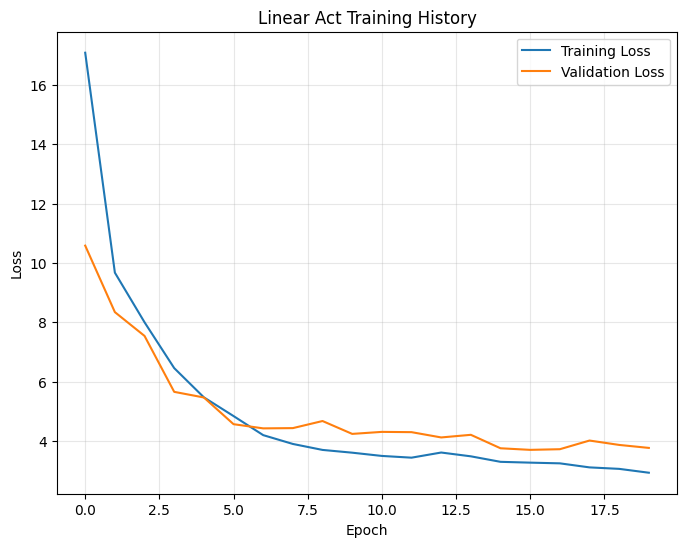

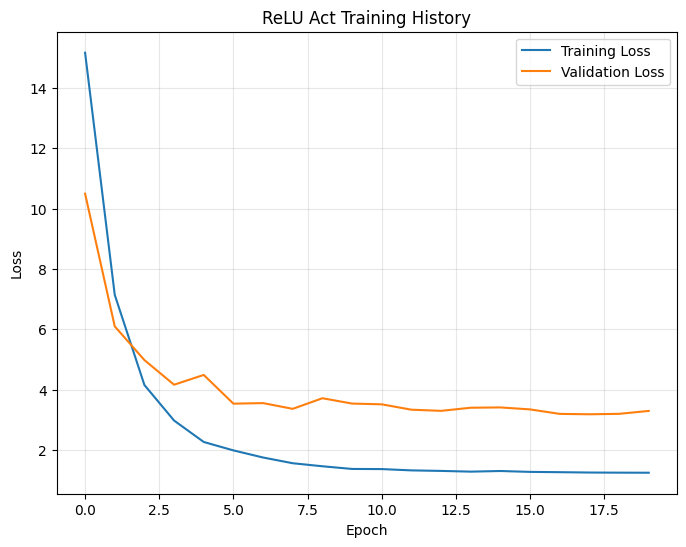

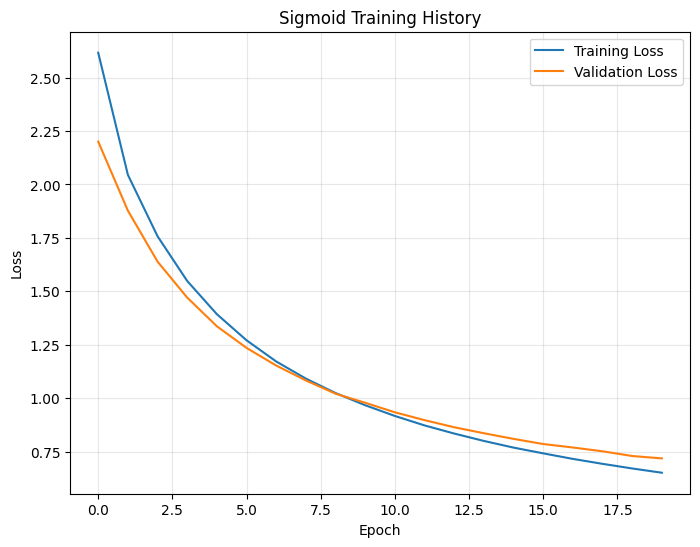

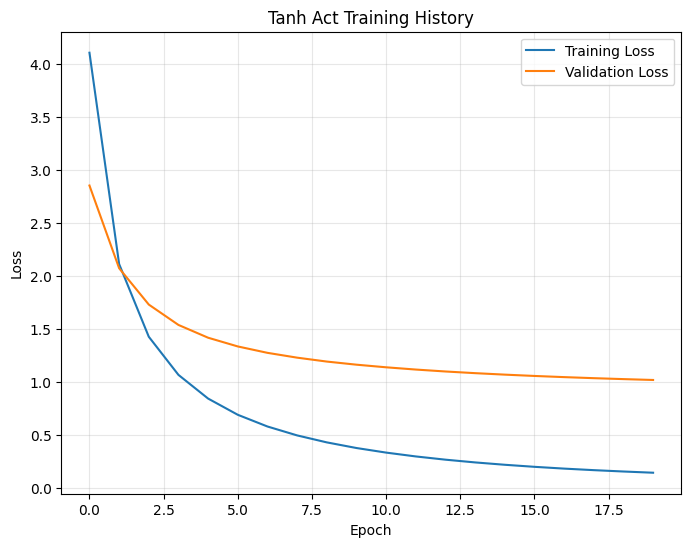

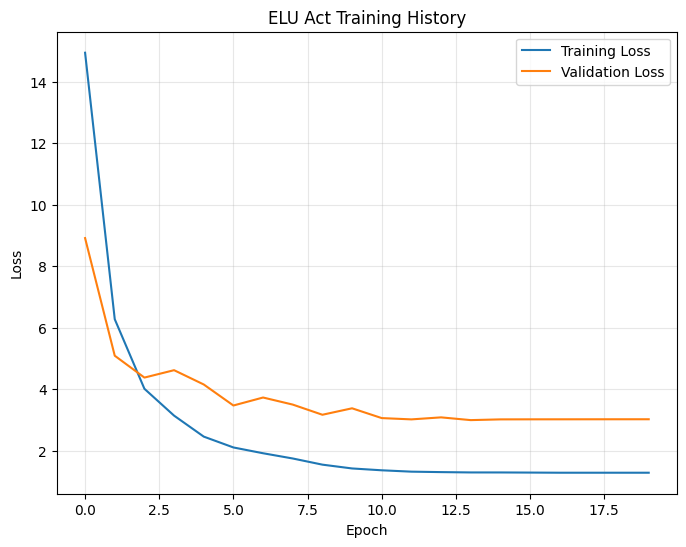

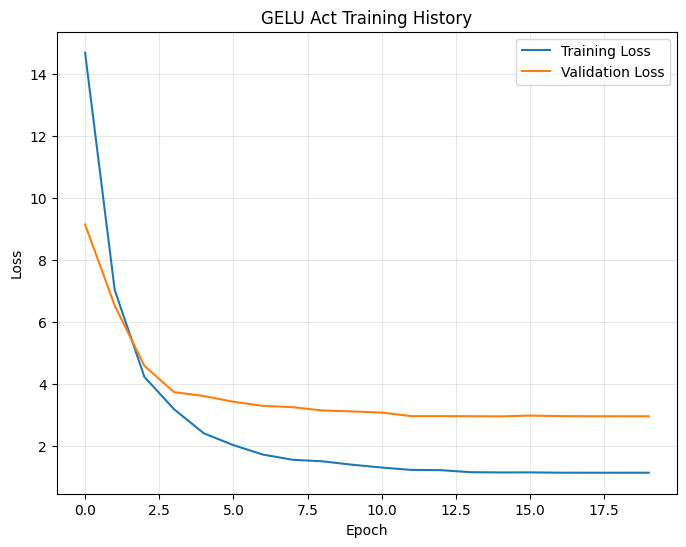

In [9]:
# Plot the training history
plot_training_loss(linear_act_history, "Linear Act Training History")

plot_training_loss(relu_act_history, "ReLU Act Training History")

plot_training_loss(sigmoid_act_history, "Sigmoid Training History")

plot_training_loss(tanh_act_history, "Tanh Act Training History")

plot_training_loss(elu_act_history, "ELU Act Training History")

plot_training_loss(gelu_act_history, "GELU Act Training History")

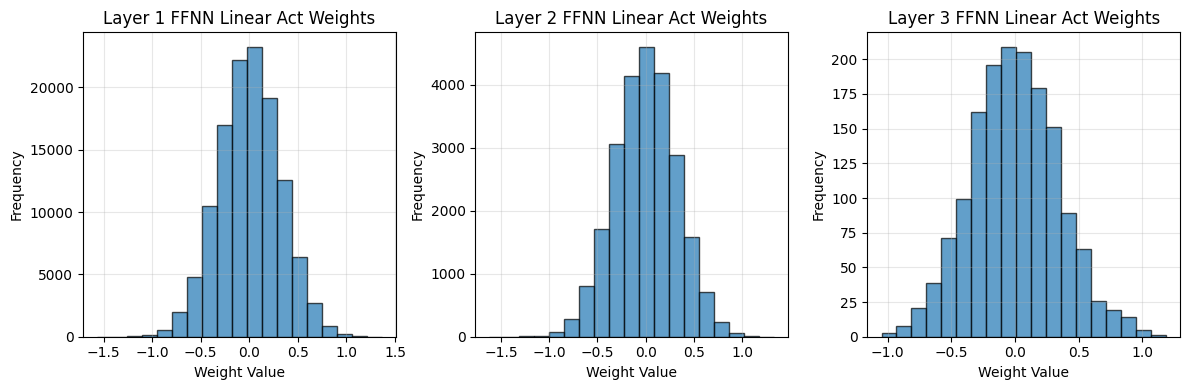

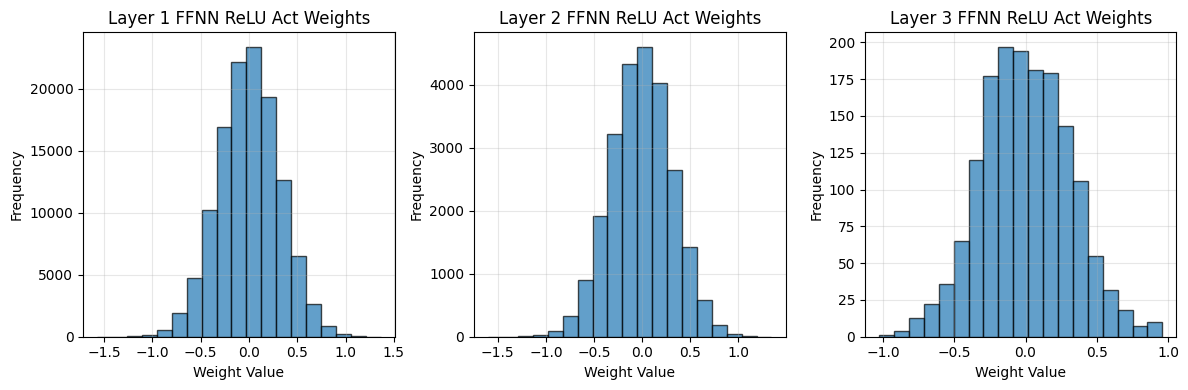

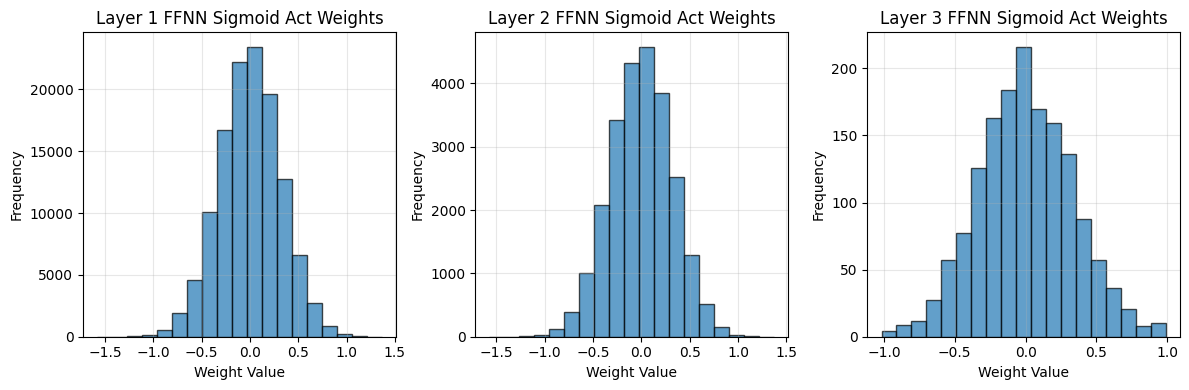

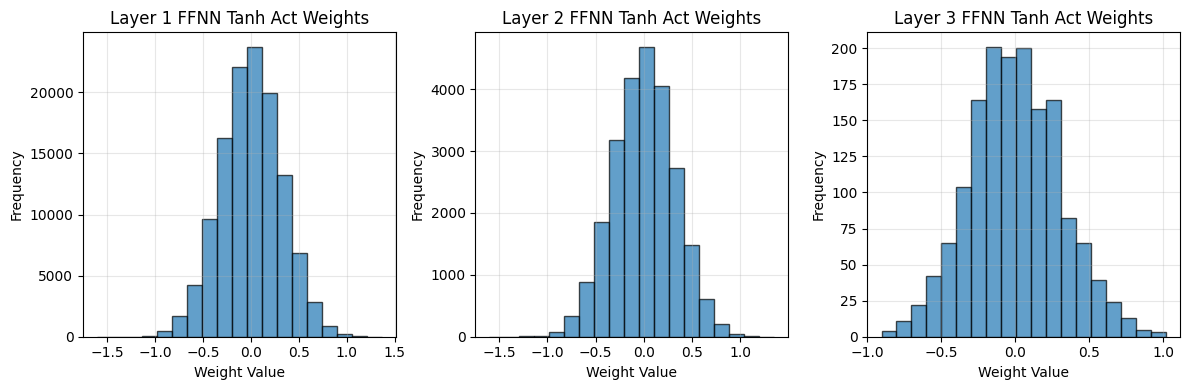

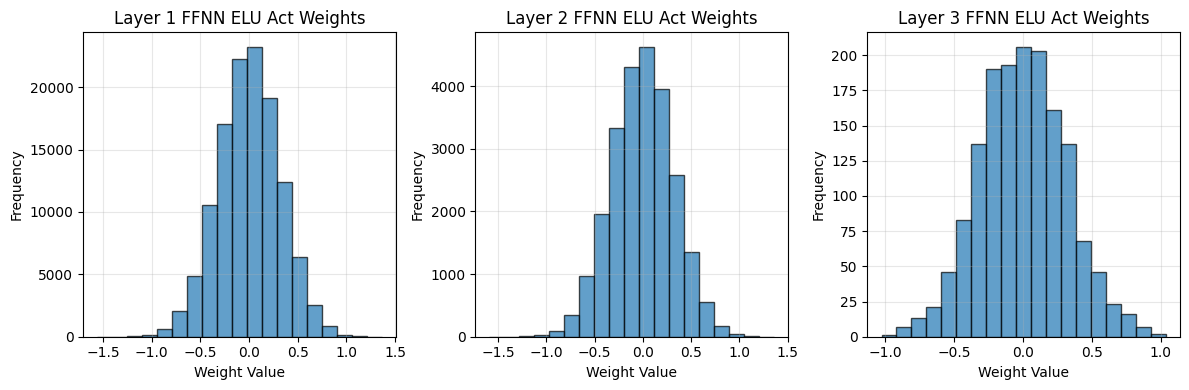

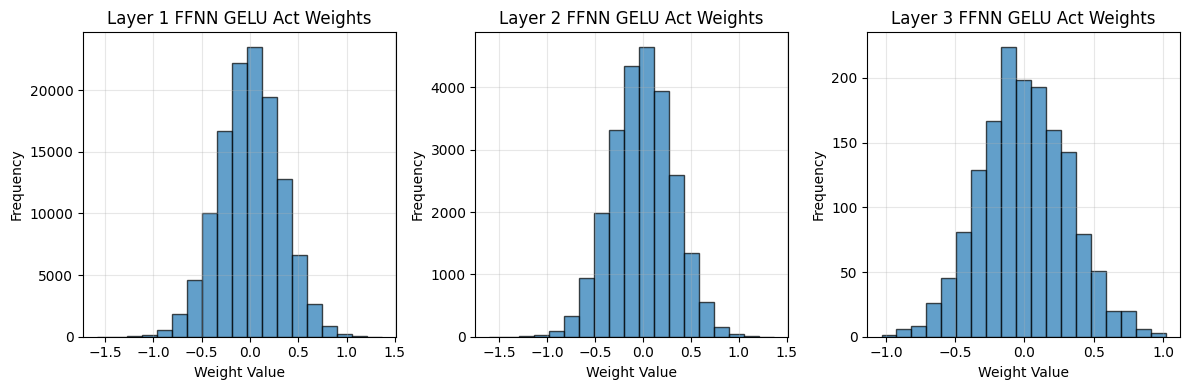

In [10]:
# Plot Weights
ffnn_linear_act.plot_weights(title="FFNN Linear Act Weights")

ffnn_relu_act.plot_weights(title="FFNN ReLU Act Weights")

ffnn_sigmoid_act.plot_weights(title="FFNN Sigmoid Act Weights")

ffnn_tanh_act.plot_weights(title="FFNN Tanh Act Weights")

ffnn_elu_act.plot_weights(title="FFNN ELU Act Weights")

ffnn_gelu_act.plot_weights(title="FFNN GELU Act Weights")

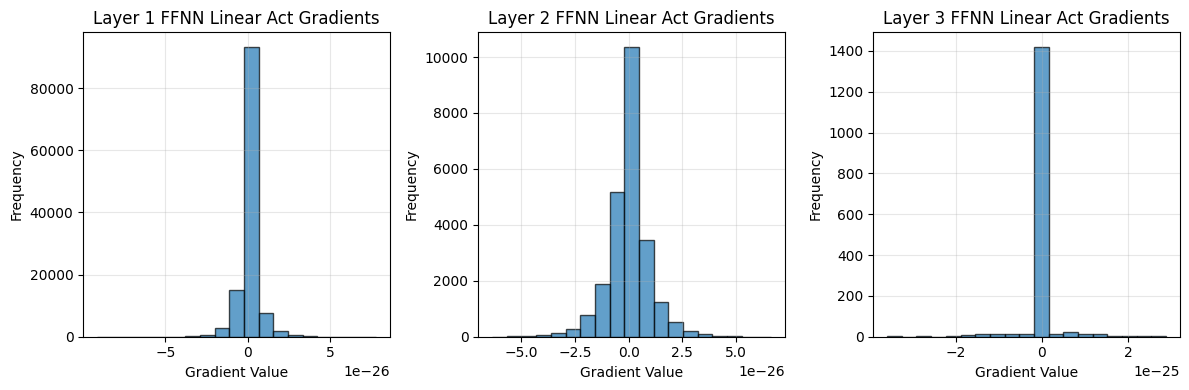

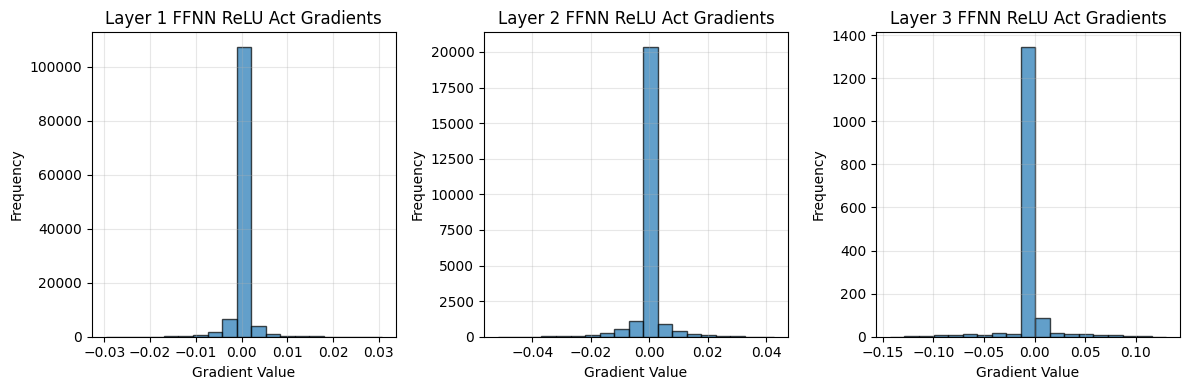

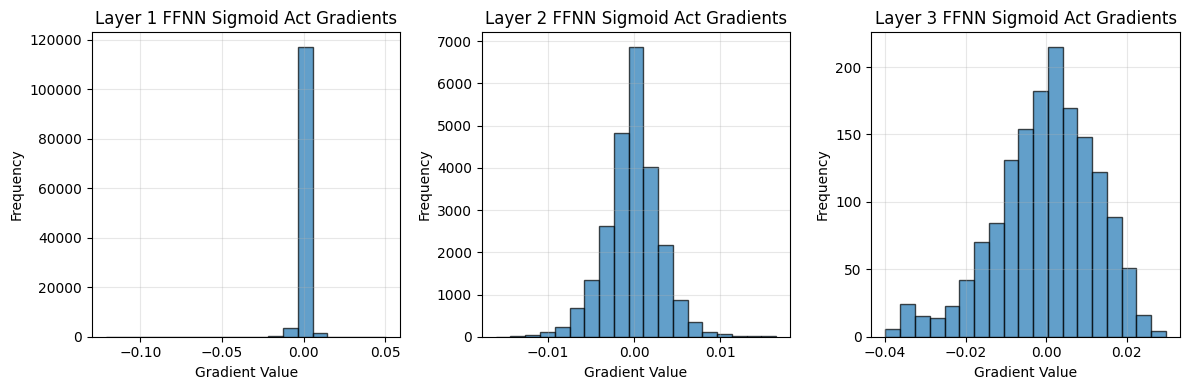

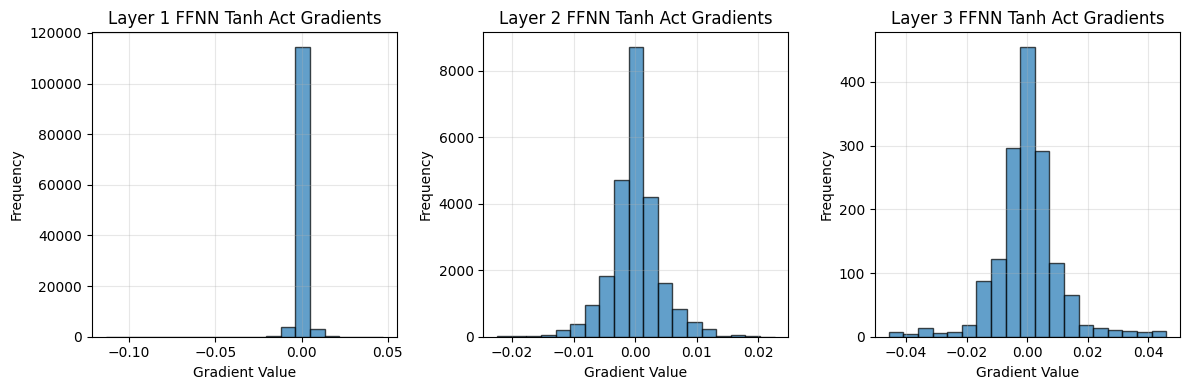

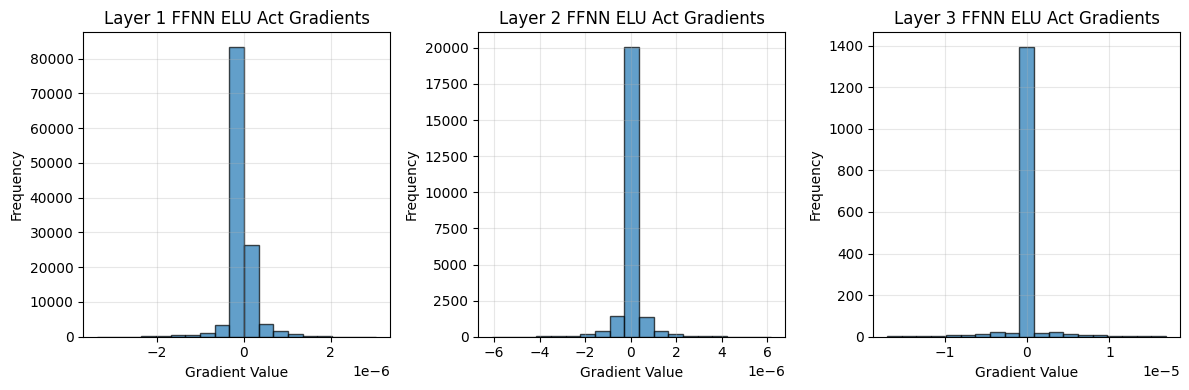

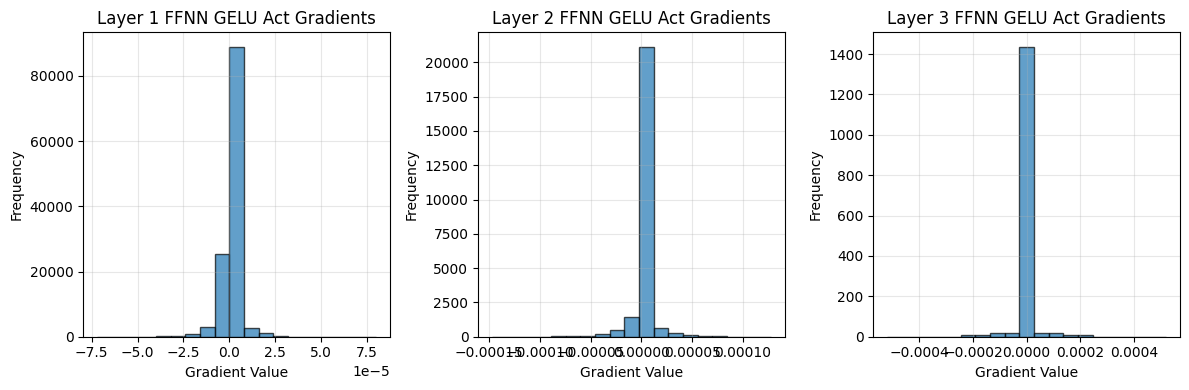

In [11]:
# Plot Gradient of Weights
ffnn_linear_act.plot_gradients(title="FFNN Linear Act Gradients")

ffnn_relu_act.plot_gradients(title="FFNN ReLU Act Gradients")

ffnn_sigmoid_act.plot_gradients(title="FFNN Sigmoid Act Gradients")

ffnn_tanh_act.plot_gradients(title="FFNN Tanh Act Gradients")

ffnn_elu_act.plot_gradients(title="FFNN ELU Act Gradients")

ffnn_gelu_act.plot_gradients(title="FFNN GELU Act Gradients")